In [52]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df_temperatura = pd.read_csv('celsius_a_fahrenheit.csv')
print(df_temperatura.head())

   Celsius  Fahrenheit
0      -50       -58.0
1      -40       -40.0
2      -30       -22.0
3      -20        -4.0
4      -10        14.0


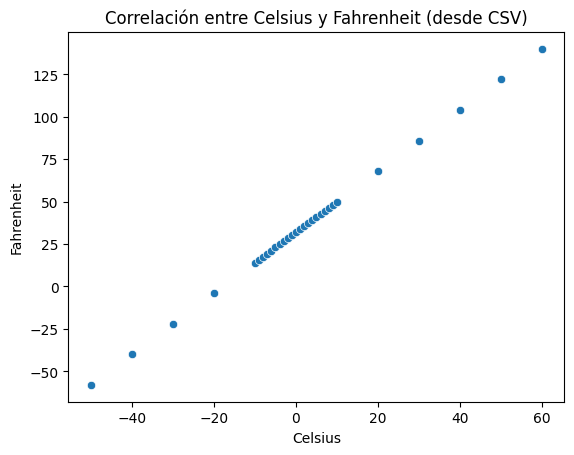

In [64]:
sns.scatterplot(x='Celsius', y='Fahrenheit', data=df_temperatura)
plt.title('Correlación entre Celsius y Fahrenheit (desde CSV)')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

In [65]:
x_train = df_temperatura['Celsius'].values
y_train = df_temperatura['Fahrenheit'].values

In [66]:
print("Creando el modelo")
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),             
    tf.keras.layers.Dense(units=3),
    tf.keras.layers.Dense(units=3),
    tf.keras.layers.Dense(units=1)
])

Creando el modelo


In [67]:
print(model.layers[0].get_weights()) 
print(model.layers[1].get_weights())  
print(model.layers[2].get_weights())  

[array([[-0.6450192 , -1.1584444 , -0.41072643]], dtype=float32), array([0., 0., 0.], dtype=float32)]
[array([[ 0.36978292,  0.6331723 , -0.2575667 ],
       [-0.7494848 , -0.37596846, -0.6286905 ],
       [ 0.546113  ,  0.41475558, -0.76904774]], dtype=float32), array([0., 0., 0.], dtype=float32)]
[array([[-0.5294798],
       [-0.5007635],
       [-0.1901102]], dtype=float32), array([0.], dtype=float32)]


In [68]:
print("Compilando el modelo")
model.compile(optimizer=tf.keras.optimizers.Adam(1.0), loss='mean_squared_error')

Compilando el modelo


In [69]:
print("Entrenando el modelo")
epochs_hist = model.fit(x_train, y_train, epochs=500, verbose=False)

Entrenando el modelo


Evaluando el modelo entranado
Keys:
dict_keys(['loss'])


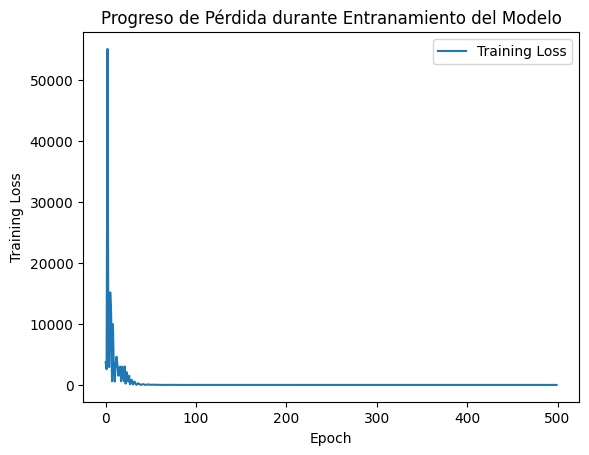

In [70]:
print("Evaluando el modelo entranado")
print("Keys:")
print(epochs_hist.history.keys())

plt.plot(epochs_hist.history['loss'])
plt.title('Progreso de Pérdida durante Entranamiento del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()

In [71]:
temp_c = 100
temp_c_array = np.array([[temp_c]])
temp_f = model.predict(temp_c_array)

print("Temperatura de Prediccion: " +str(temp_f))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Temperatura de Prediccion: [[212.]]


In [72]:
temp_f = 9/5 * temp_c + 32
print("Temperatura de Ecuacion: " + str(temp_f))

Temperatura de Ecuacion: 212.0
